In [ ]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob

In [ ]:
                               # METHOD 01
df1=pd.read_csv(r"/content/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"/content/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"/content/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df4=pd.read_csv(r"/content/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df5=pd.read_csv(r"/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
926352,2024-05,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,145.0,Apartment,1988,735000.0,63 years 03 months
926353,2024-05,YISHUN,EXECUTIVE,355A,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,815888.0,63 years 02 months
926354,2024-05,YISHUN,EXECUTIVE,292,YISHUN ST 22,01 TO 03,169.0,Apartment,1992,1032000.0,67 years 02 months
926355,2024-05,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,800000.0,62 years 05 months


In [ ]:
df.shape

(926357, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926357 entries, 0 to 926356
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                926357 non-null  object 
 1   town                 926357 non-null  object 
 2   flat_type            926357 non-null  object 
 3   block                926357 non-null  object 
 4   street_name          926357 non-null  object 
 5   storey_range         926357 non-null  object 
 6   floor_area_sqm       926357 non-null  float64
 7   flat_model           926357 non-null  object 
 8   lease_commence_date  926357 non-null  int64  
 9   resale_price         926357 non-null  float64
 10  remaining_lease      217307 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.7+ MB


In [ ]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,926357.0,95.691375,25.826294,28.0,73.0,93.0,113.0,307.0
lease_commence_date,926357.0,1988.266836,10.653244,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,926357.0,320498.754999,170195.017458,5000.0,193000.0,297000.0,417888.0,1568888.0


In [ ]:
df['resale_price'].value_counts()

resale_price
300000.0    6922
350000.0    6841
280000.0    6548
320000.0    6526
250000.0    6284
            ... 
288805.0       1
259280.0       1
167288.0       1
323600.0       1
370008.0       1
Name: count, Length: 9504, dtype: int64

In [ ]:
df.nunique()

month                   413
town                     27
flat_type                 8
block                  2710
street_name             584
storey_range             25
floor_area_sqm          212
flat_model               34
lease_commence_date      56
resale_price           9504
remaining_lease         724
dtype: int64

In [ ]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [ ]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [ ]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [ ]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
926352,2024-05,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,145.0,Apartment,1988,735000.0,63.250000
926353,2024-05,YISHUN,EXECUTIVE,355A,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,815888.0,63.166667
926354,2024-05,YISHUN,EXECUTIVE,292,YISHUN ST 22,01 TO 03,169.0,Apartment,1992,1032000.0,67.166667
926355,2024-05,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,800000.0,62.416667
926356,2024-05,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,948000.0,62.750000


In [ ]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711642
95.000000      2364
67.000000      2211
69.000000      1913
71.000000      1762
              ...  
97.333333         2
97.750000         1
97.583333         1
97.250000         1
96.833333         1
Name: count, Length: 671, dtype: int64

In [ ]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [ ]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [ ]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [ ]:
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
926355,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,800000.0,62.416667,2024,05,10,12
926356,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,948000.0,62.750000,2024,05,4,6


In [ ]:
df.drop('storey_range', axis = 1, inplace= True)

In [ ]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [ ]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [ ]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

In [ ]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [ ]:
df['town'].value_counts()

town
TAMPINES           79917
YISHUN             70023
JURONG WEST        66647
BEDOK              66635
WOODLANDS          65494
ANG MO KIO         52044
HOUGANG            50712
BUKIT BATOK        44367
CHOA CHU KANG      38283
BUKIT MERAH        34337
PASIR RIS          33208
SENGKANG           32421
TOA PAYOH          31497
QUEENSTOWN         28756
GEYLANG            28148
CLEMENTI           28015
BUKIT PANJANG      27671
KALLANG/WHAMPOA    27160
JURONG EAST        24769
SERANGOON          22817
BISHAN             21248
PUNGGOL            20592
SEMBAWANG          13839
MARINE PARADE       8034
CENTRAL AREA        7144
BUKIT TIMAH         2515
LIM CHU KANG          64
Name: count, dtype: int64

In [ ]:
df['flat_type'].value_counts()

flat_type
4 ROOM              352031
3 ROOM              295776
5 ROOM              195273
EXECUTIVE            69618
2 ROOM               11812
1 ROOM                1304
MULTI GENERATION       279
MULTI-GENERATION       264
Name: count, dtype: int64

In [ ]:
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [ ]:
df['flat_type'].value_counts()

flat_type
4 ROOM              352031
3 ROOM              295776
5 ROOM              195273
EXECUTIVE            69618
2 ROOM               11812
1 ROOM                1304
MULTI GENERATION       543
Name: count, dtype: int64

In [ ]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17591
BEDOK RESERVOIR RD    14720
ANG MO KIO AVE 10     13802
ANG MO KIO AVE 3      12148
HOUGANG AVE 8          9361
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [ ]:
df['flat_model'].value_counts()

flat_model
Model A                   194450
Improved                  168059
New Generation            110003
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46704
Simplified                 34265
Apartment                  25557
Standard                   25146
SIMPLIFIED                 23258
Maisonette                 17431
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10129
APARTMENT                   9901
DBSS                        3296
Adjoined flat               1247
Model A-Maisonette          1094
MODEL A-MAISONETTE           982
Terrace                      446
Type S1                      435
MULTI GENERATION             279
Multi Generation             264
TERRACE                      247
Type S2                      217
2-room                       111
Premium Apartment Loft       108
Premium Maisonette            86
Improved-Maisonette           82

In [ ]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [ ]:
df['flat_model'].value_counts()

flat_model
Model A                   264831
Improved                  241648
New Generation            188901
Simplified                 57523
Premium Apartment          46710
Standard                   42521
Apartment                  35458
Maisonette                 29646
Model A2                   10129
DBSS                        3296
Model A-Maisonette          2076
Adjoined flat               1247
Terrace                      693
Multi Generation             543
Type S1                      435
Type S2                      217
2-room                       132
Improved-Maisonette          126
Premium Apartment Loft       108
Premium Maisonette            86
3Gen                          31
Name: count, dtype: int64

In [ ]:
df.duplicated().sum()

2347

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [ ]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

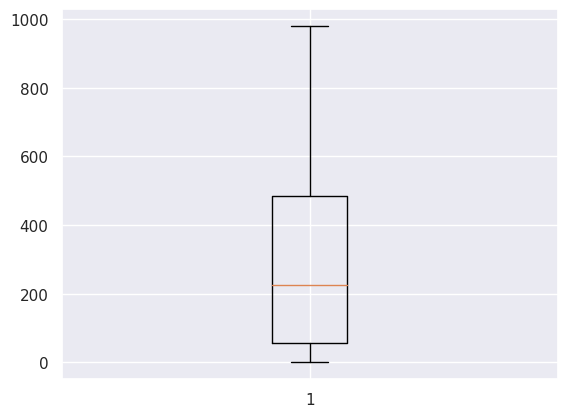

In [ ]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

In [ ]:
Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-583.5, 1124.5)

In [ ]:
df.block = df.block.clip(lower_bound , upper_bound)

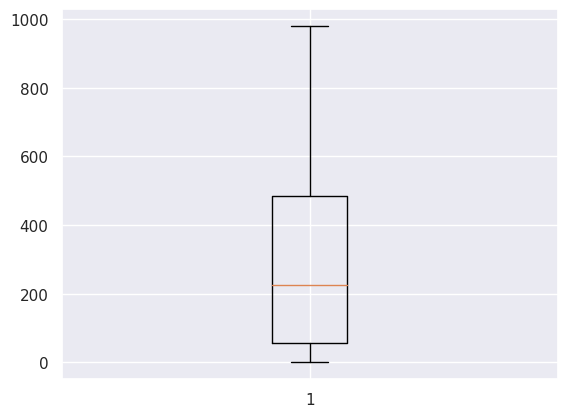

In [ ]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

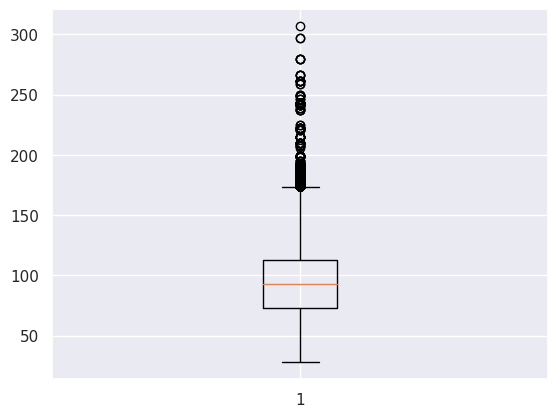

In [ ]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

In [ ]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(13.0, 173.0)

In [ ]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)

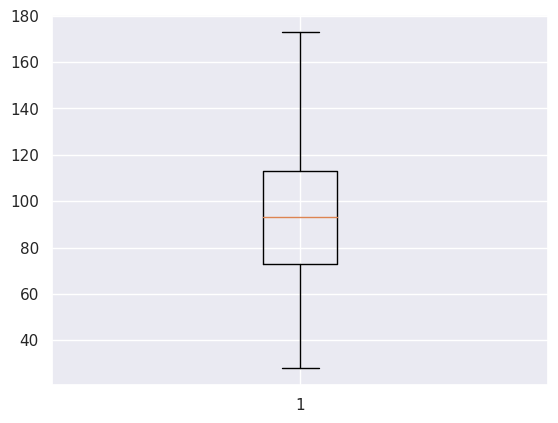

In [ ]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

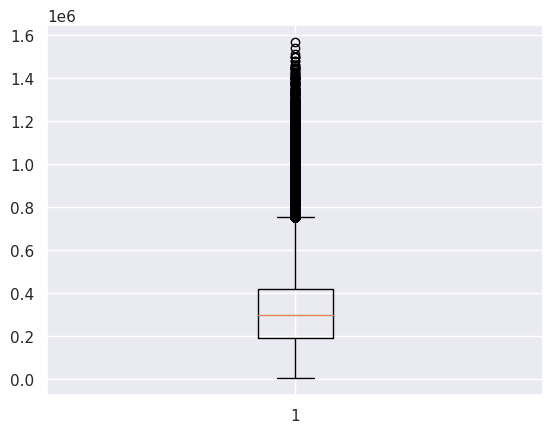

In [ ]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [ ]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-143000.0, 753000.0)

In [ ]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)

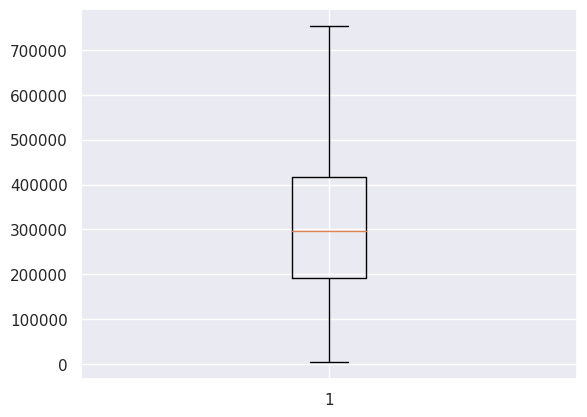

In [ ]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

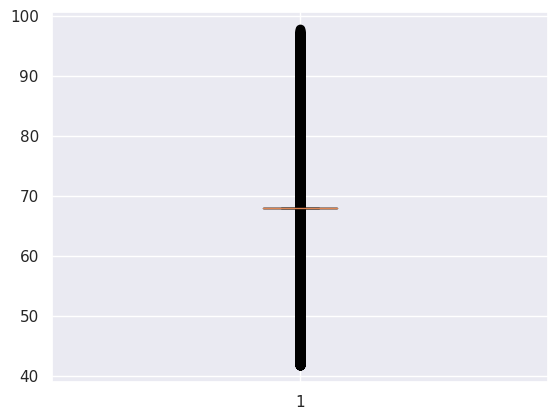

In [ ]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [ ]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(68.0, 68.0)

In [ ]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)

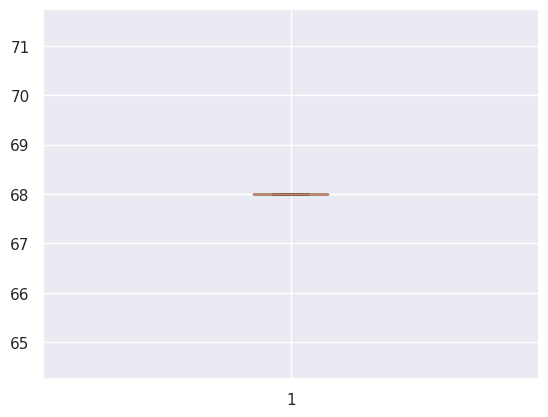

In [ ]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

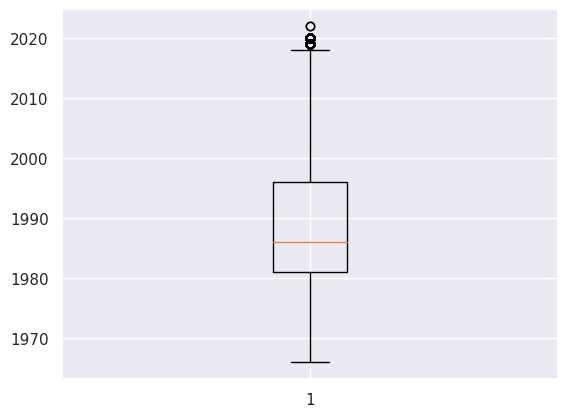

In [ ]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

In [ ]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(1958.5, 2018.5)

In [ ]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)

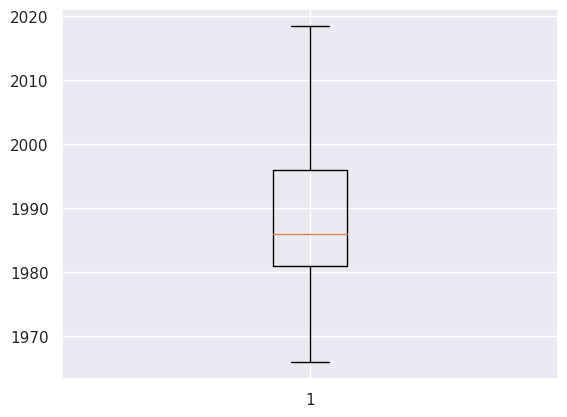

In [ ]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

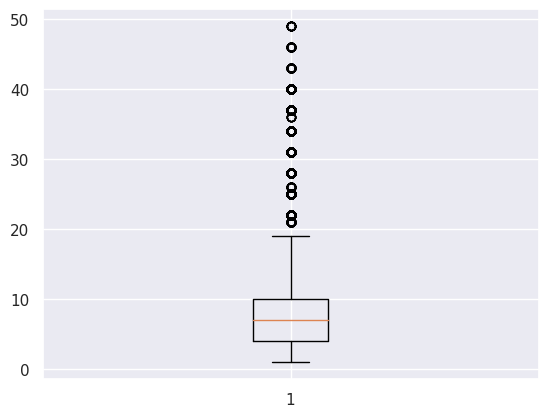

In [ ]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [ ]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-5.0, 19.0)

In [ ]:

df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)

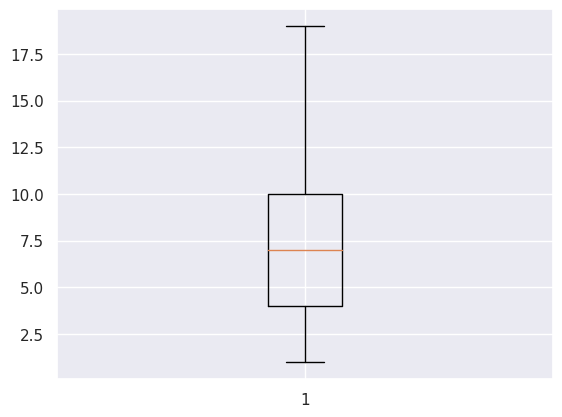

In [ ]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

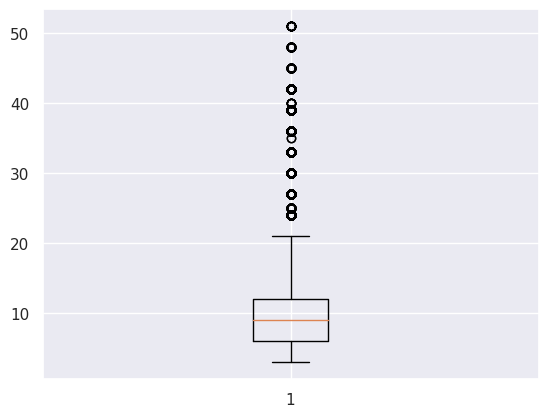

In [ ]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [ ]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.0, 21.0)

In [ ]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)

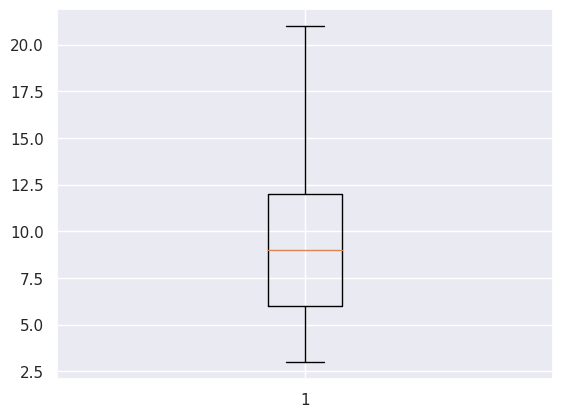

In [ ]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [ ]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

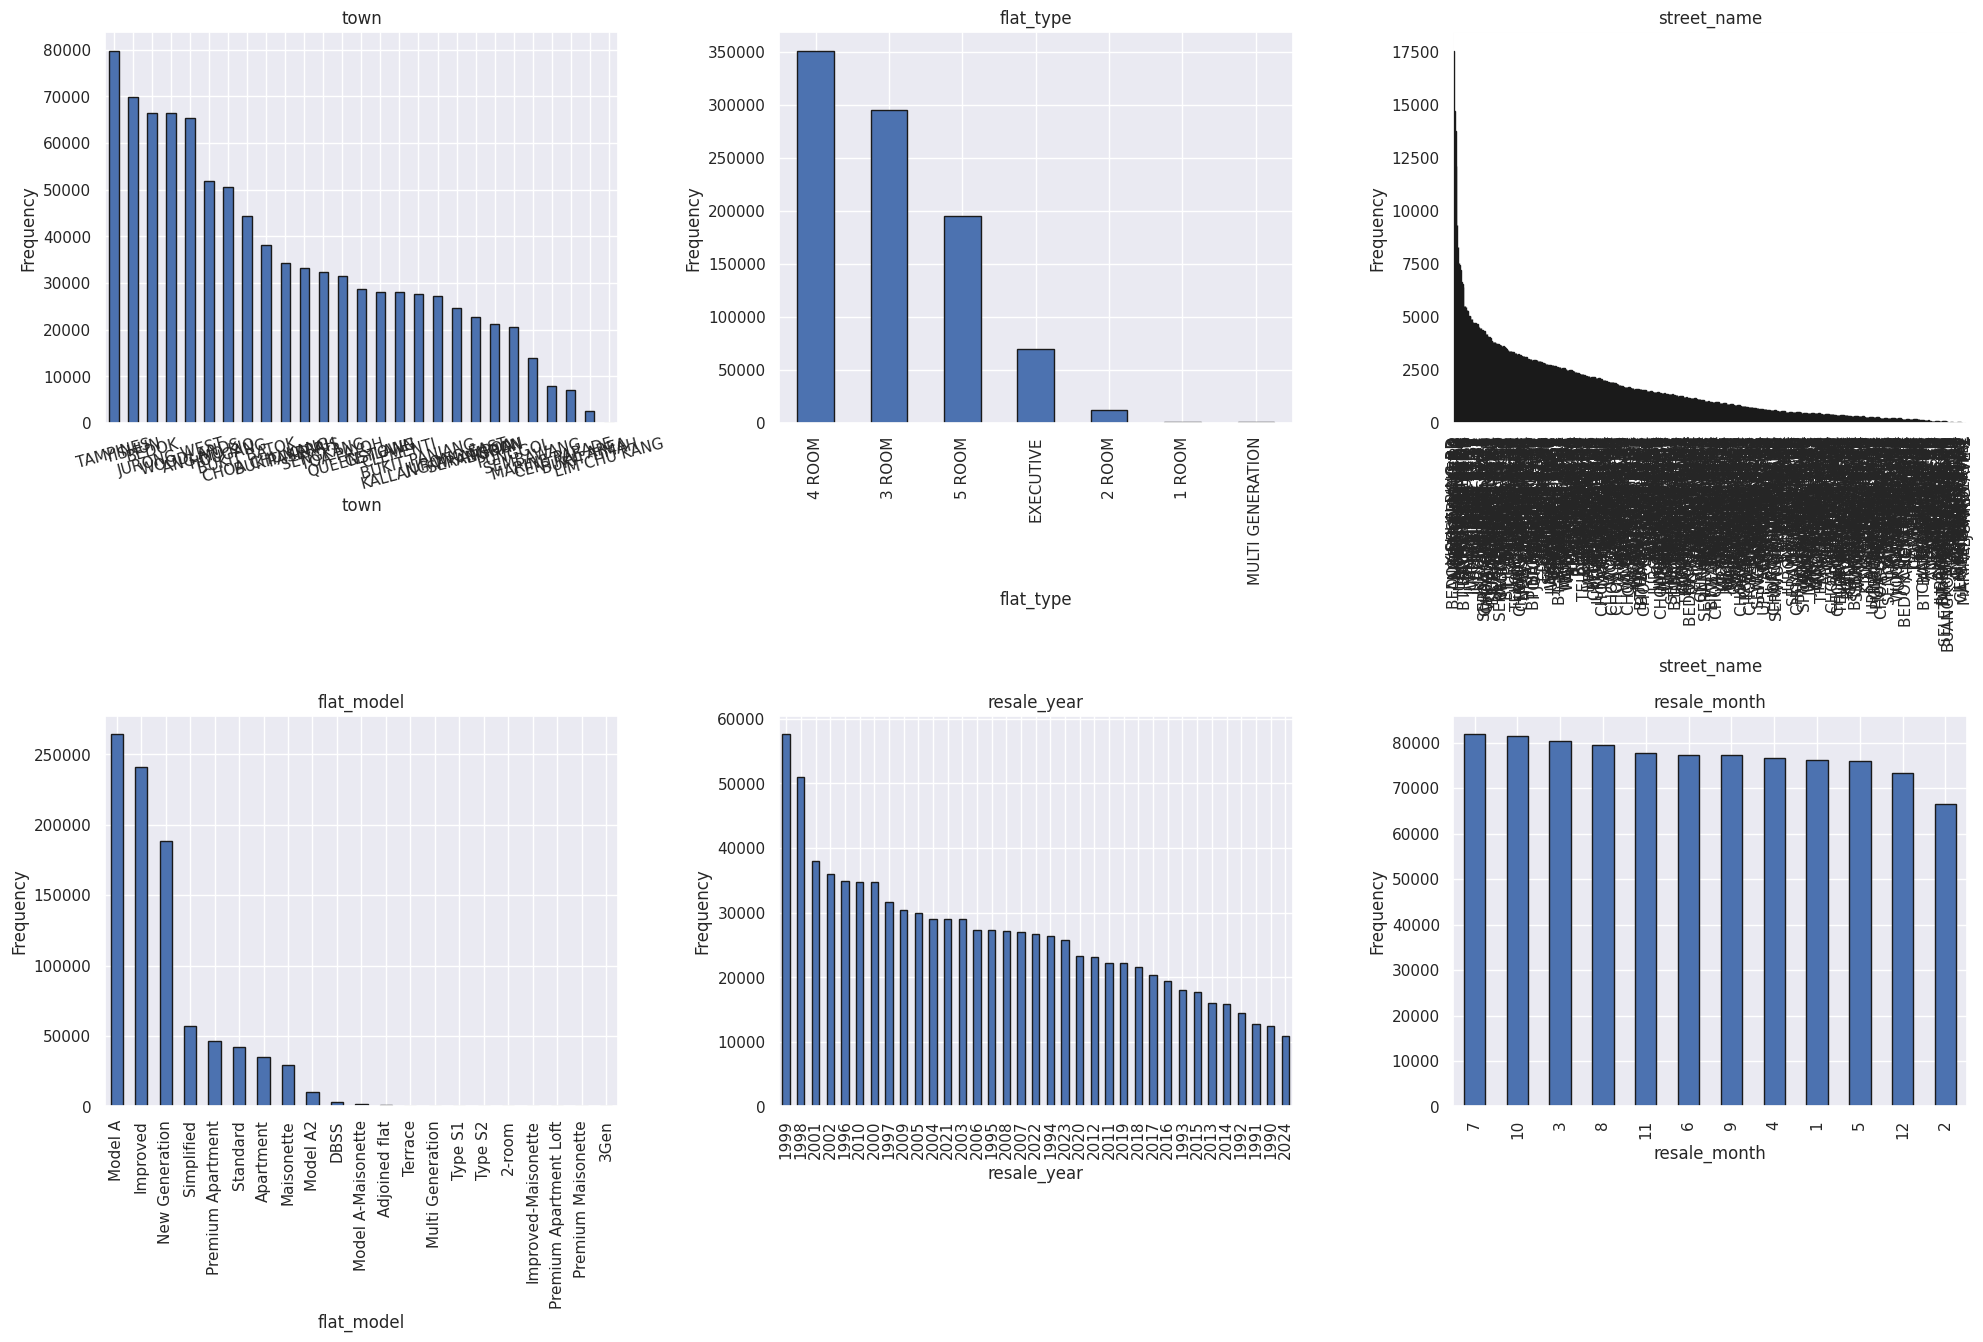

In [ ]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

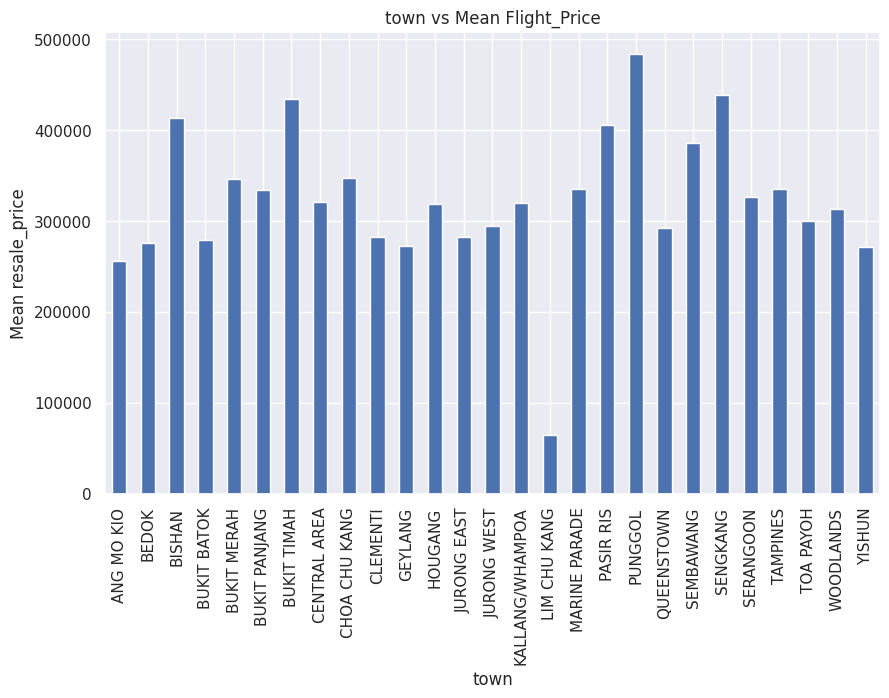

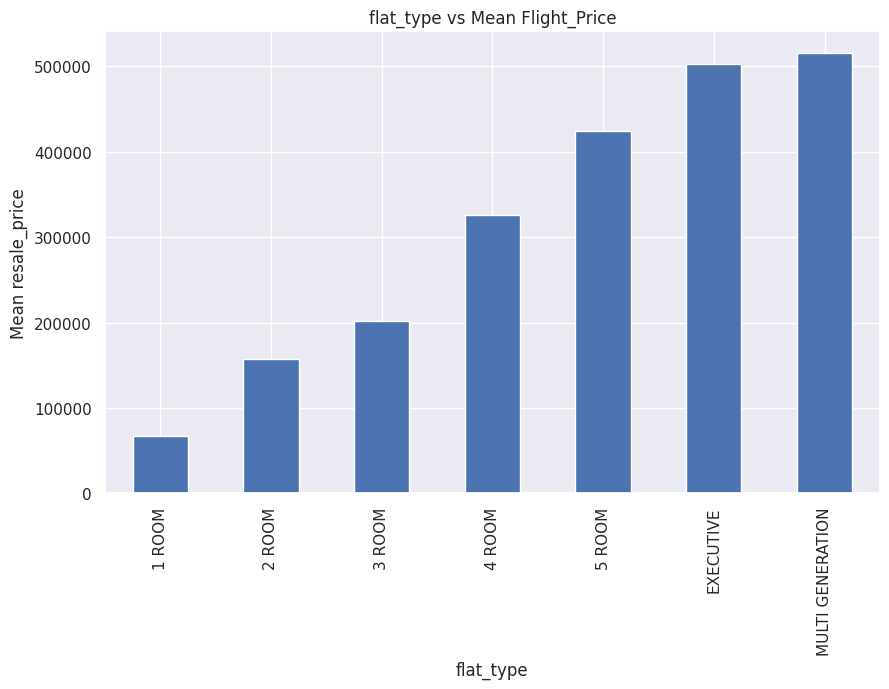

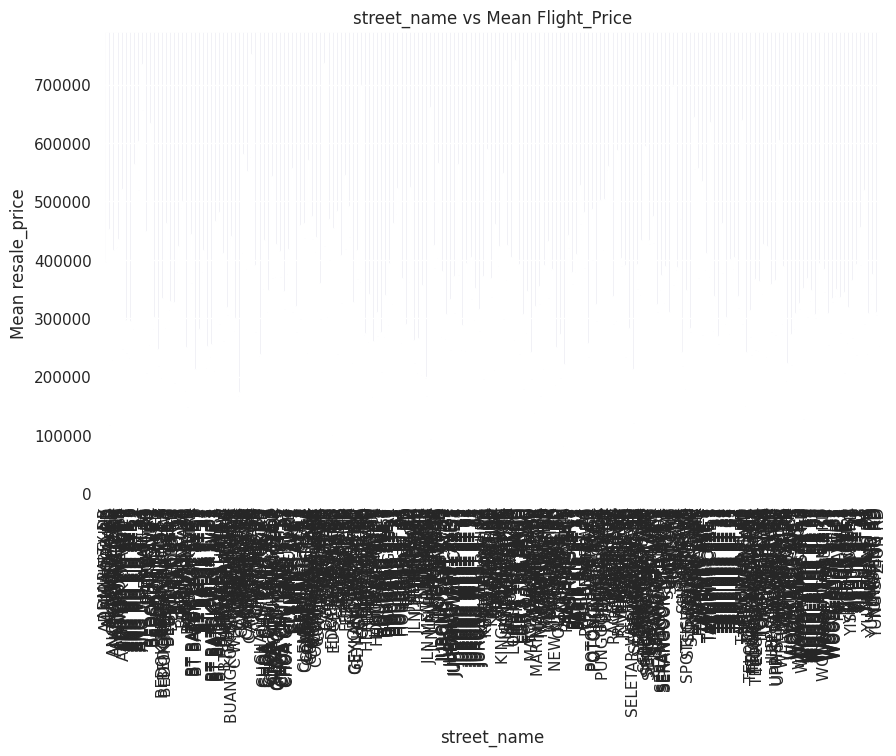

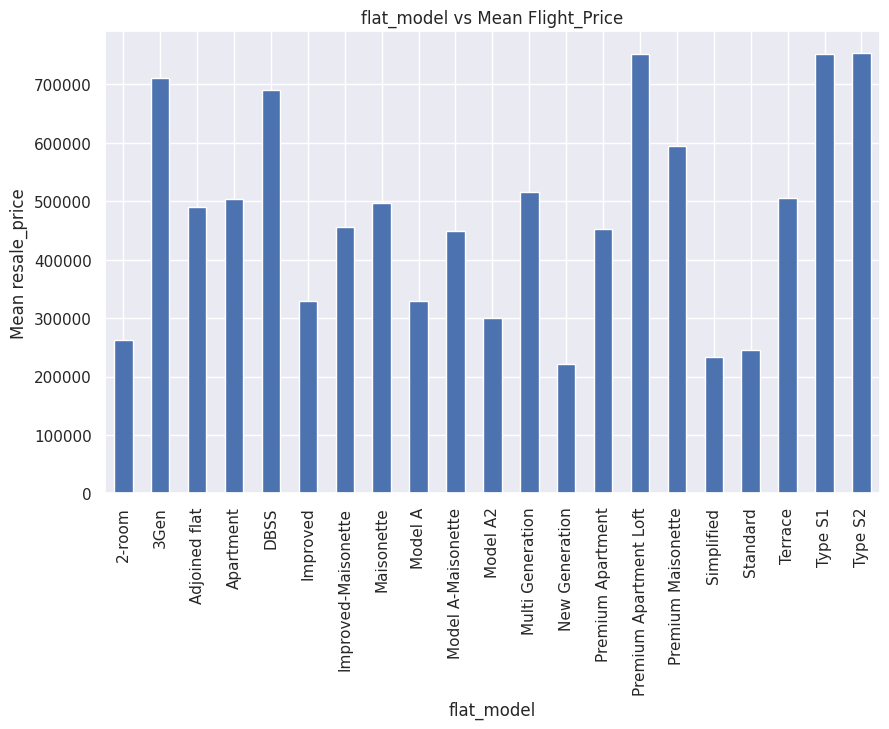

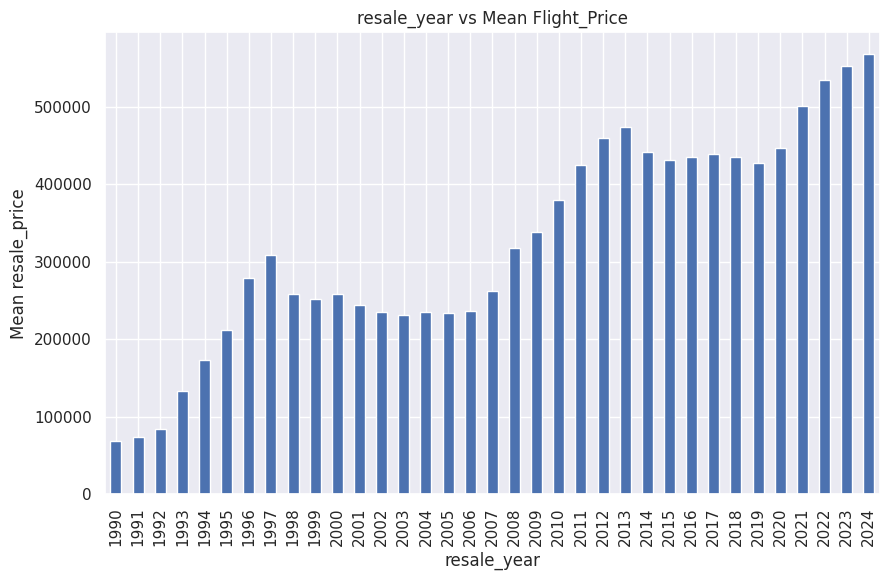

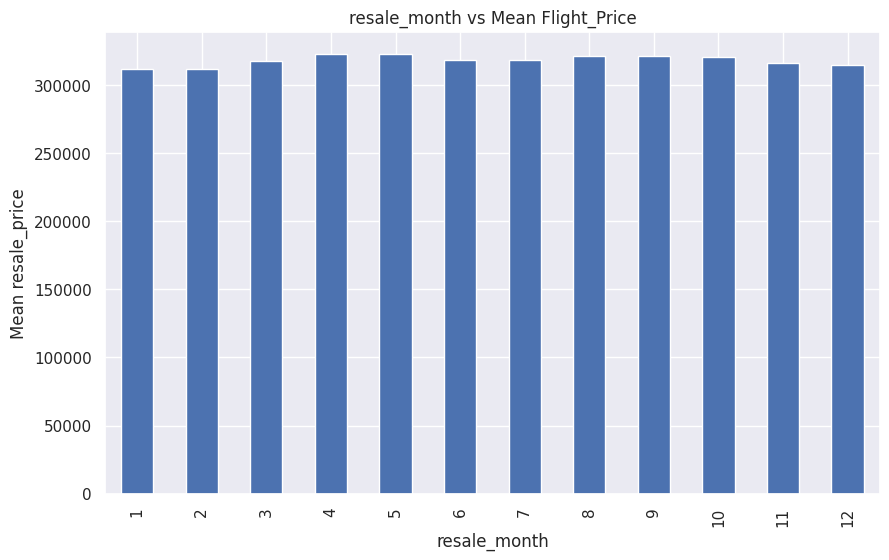

In [ ]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()

In [ ]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [ ]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

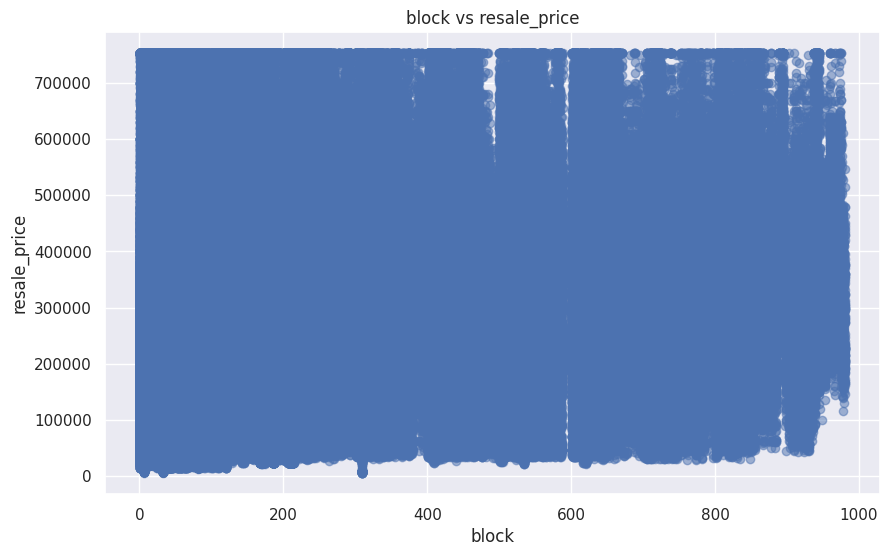

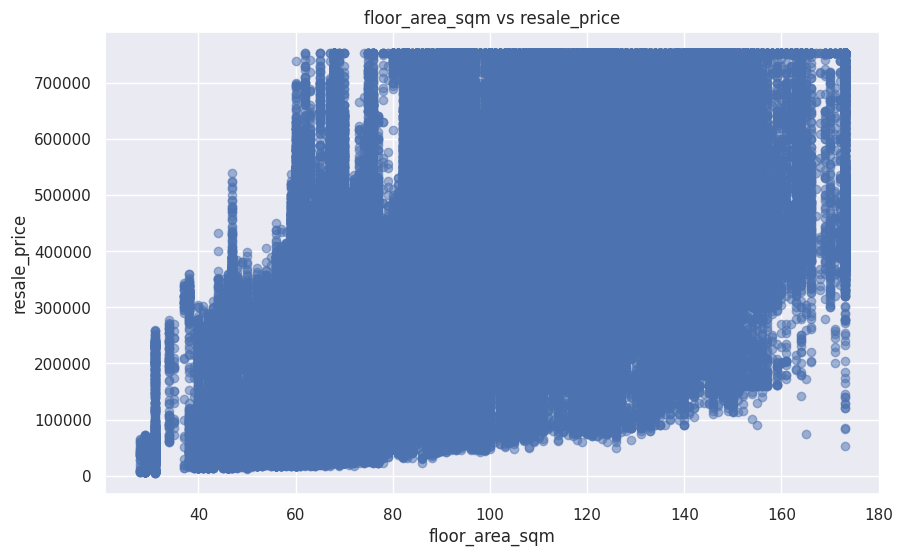

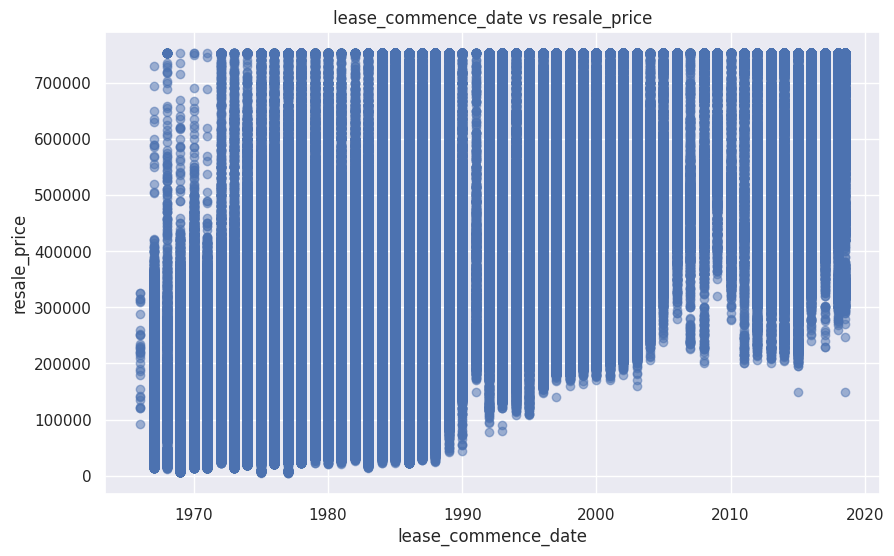

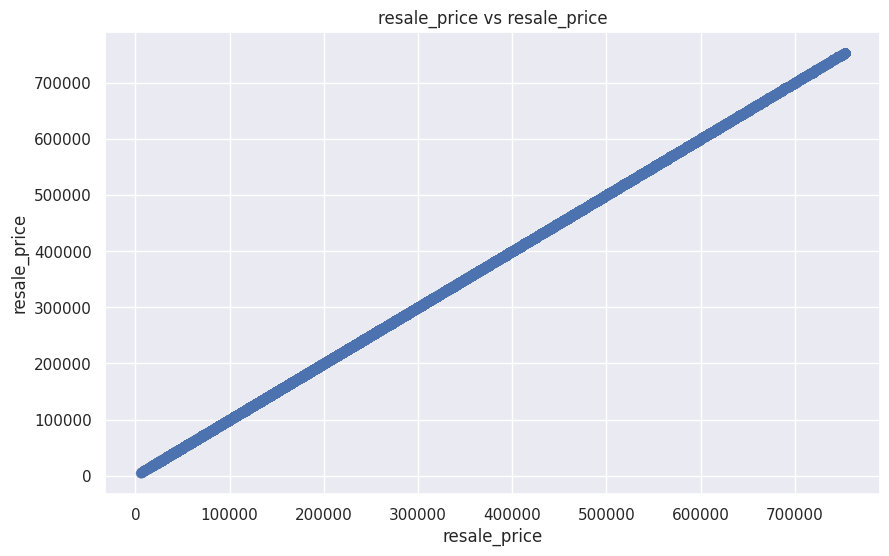

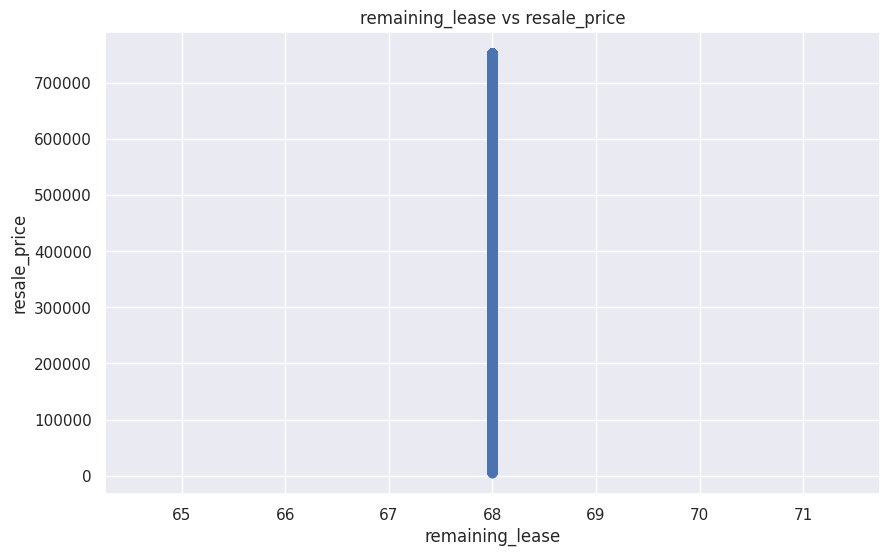

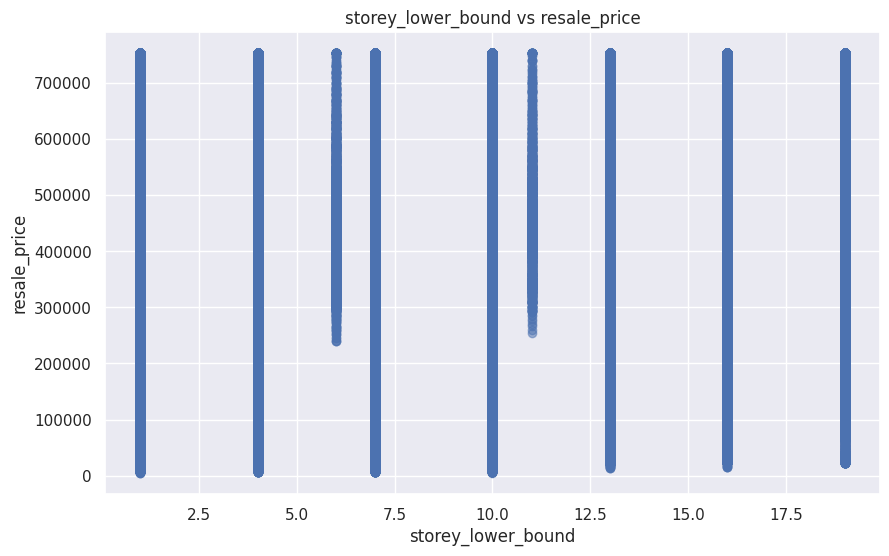

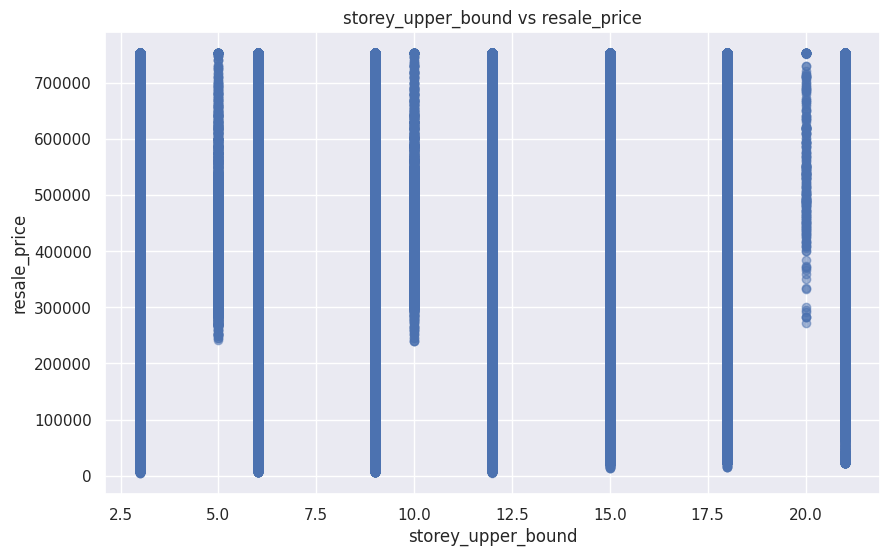

In [ ]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound',
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

In [ ]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [ ]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [ ]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [ ]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [ ]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [ ]:
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [ ]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [ ]:
df1.to_csv('final.csv')

In [ ]:
# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.208494,0.050589,0.587404,0.201314,0.163715,0.333720,0.123554,NaN,0.124218,0.003962,-0.019148,-0.018883
flat_type,0.208494,1.000000,0.127926,0.387245,0.954844,0.242667,0.409675,0.601257,NaN,0.101218,0.003419,0.077613,0.077945
block,0.050589,0.127926,1.000000,0.047465,0.187806,-0.002673,0.005522,-0.081895,NaN,-0.115697,0.002139,-0.124435,-0.124474
street_name,0.587404,0.387245,0.047465,1.000000,0.356210,0.354107,0.738224,0.379153,NaN,0.317383,0.006355,0.081438,0.082080
floor_area_sqm,0.201314,0.954844,0.187806,0.356210,1.000000,0.200547,0.387884,0.575876,NaN,0.063005,0.002848,0.043883,0.044072
flat_model,0.163715,0.242667,-0.002673,0.354107,0.200547,1.000000,0.356100,0.245953,NaN,0.162502,0.001625,0.019757,0.020117
lease_commence_date,0.333720,0.409675,0.005522,0.738224,0.387884,0.356100,1.000000,0.543140,NaN,0.430348,0.003757,0.153111,0.153519
resale_price,0.123554,0.601257,-0.081895,0.379153,0.575876,0.245953,0.543140,1.000000,NaN,0.682262,0.005773,0.209454,0.212134
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.124218,0.101218,-0.115697,0.317383,0.063005,0.162502,0.430348,0.682262,NaN,1.000000,-0.025266,0.096128,0.098192


<Axes: >

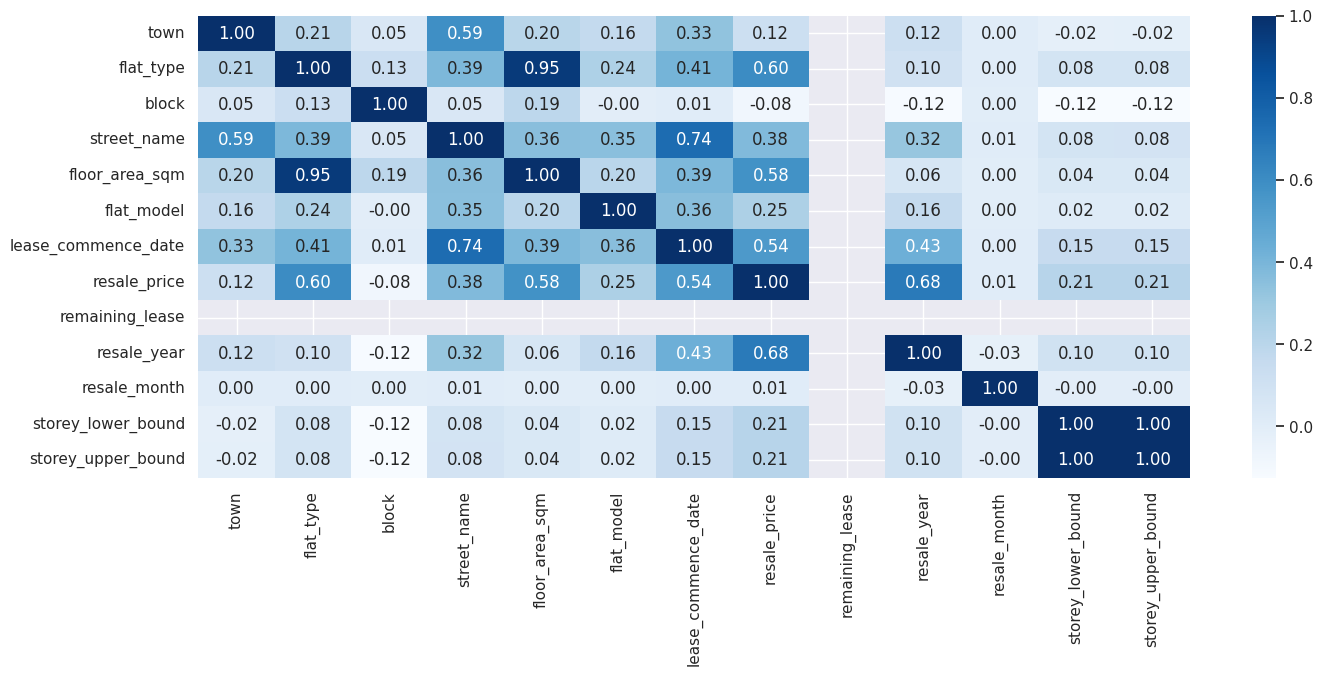

In [ ]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

In [ ]:
# assign feature and target variable
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(739208, 12) (184802, 12) (739208,) (184802,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-0.34101809,  2.09330257,  1.24849883, ..., -0.1620565 ,
         -1.25410083, -1.25767468],
        [-1.11048434, -0.01577943, -0.92502514, ..., -1.04042577,
          0.09405955,  0.09080817],
        [ 1.06967004,  2.09330257,  0.23596402, ..., -0.74763601,
         -0.58002064, -0.58343325],
        ...,
        [ 1.45440316,  1.03876157, -0.19036642, ..., -0.1620565 ,
          1.44221994,  1.43929102],
        [ 0.30020379, -0.01577943, -0.7613447 , ...,  0.42352301,
          1.44221994,  1.43929102],
        [-1.23872872, -0.01577943,  0.44532272, ...,  0.71631276,
         -0.58002064, -0.58343325]]),
 array([[ 0.68493691, -0.01577943, -1.10773819, ...,  0.13073325,
          0.76813975,  0.7650496 ],
        [ 0.81318129,  1.03876157, -0.88695992, ..., -1.33321552,
          1.44221994,  1.43929102],
        [-1.62346184, -1.07032043, -0.72327948, ...,  0.71631276,
          0.09405955,  0.09080817],
        ...,
        [-1.49521747,  1.03876157, -1.03922079, ..., -

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[502585.15461882 490398.52835976  94690.79758897 ... 444864.69544231
 554507.70723443 178790.63170934]
821122    458000.0
601391    608888.0
8744       47000.0
386620    212000.0
147091    185000.0
            ...   
74449      77000.0
28219     110000.0
491289    361000.0
837599    605000.0
412415    146000.0
Name: resale_price, Length: 184802, dtype: float64


In [ ]:
linear_model.score(X_test, y_test)

0.7917138553145467

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.7914421488392386

In [ ]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 28880.127182736127
Mean Squared Error (MSE)     : 1771257404.2147837
Root Mean Square Error (RMSE): 42086.30898777872
R-squared (R2) Score         : 0.9330283808655897


In [ ]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17359.23114928616
Mean Squared Error (MSE)     : 658614220.8533012
Root Mean Square Error (RMSE): 25663.48029502821
R-squared (R2) Score         : 0.97509765624661


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 13873.77055958623
Mean Squared Error (MSE)     : 401866634.53424525
Root Mean Square Error (RMSE): 20046.611547447246
R-squared (R2) Score         : 0.9848053370860652


In [ ]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)

Mean Absolute Error (MAE)    : 16835.319356922562
Mean Squared Error (MSE)     : 556503721.4626732
Root Mean Square Error (RMSE): 23590.331101166707
R-squared (R2) Score         : 0.9789584759437027


In [ ]:
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
score = [r2_knn,r2_dt, rf_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9330283808655897
DecisionTreeRegressor 0.97509765624661
RandomForestRegressor 0.9848053370860652
XGBRegressor 0.9789584759437027

Model: RandomForestRegressor contain Maximum R2_Score: 0.9848053370860652 


In [ ]:
rf_regressor.feature_importances_

array([0.04178203, 0.04968795, 0.01457822, 0.02358154, 0.28119888,
       0.00777354, 0.03320708, 0.        , 0.53047902, 0.00650005,
       0.00466822, 0.00654347])

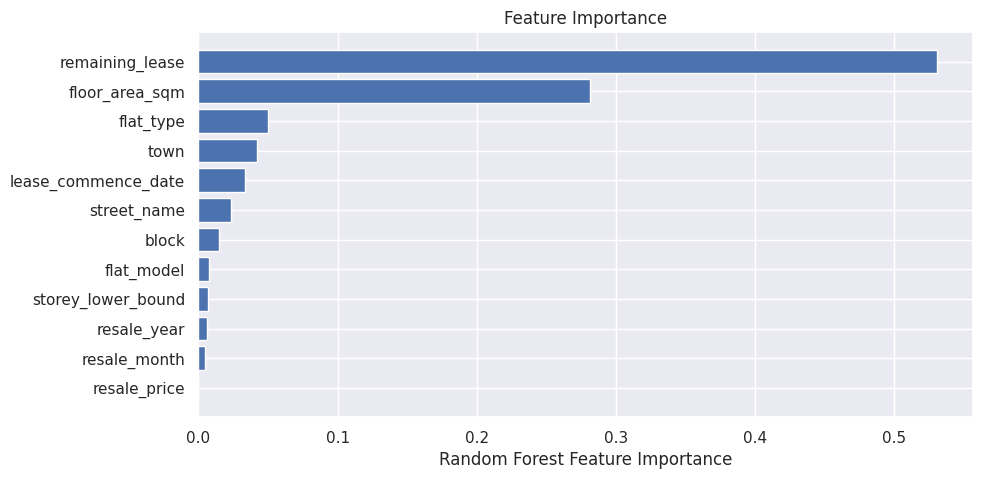

In [ ]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()

In [ ]:
model=rf_regressor.fit(X_train, y_train)

In [ ]:
model

NameError: name 'model' is not defined

In [ ]:
import pickle


# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Saved {filename} model to disk")